# Taller Simulación, Análisis Estadístico

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## 1. Comprender diversas situaciones haciendo uso de análisis estadístico

Tener en cuenta: 

- Diagrama de Cajas
- Tendencia central
- Varianza de los datos
- Desviación de los datos

### Dataset Titanic

In [ ]:
titanic = sb.load_dataset('titanic')

#### Información acerca de los datos

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


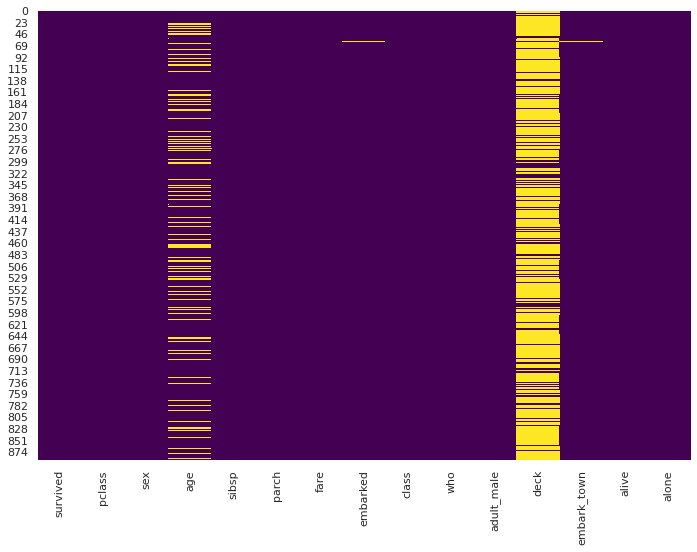

In [ ]:
sb.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

#### Manipulación de columnas (datos nulos e información no importante)

In [ ]:
def impute_age(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return titanic[titanic['pclass']==1]['age'].mean()
    elif pclass == 2:
      return titanic[titanic['pclass']==2]['age'].mean()
    elif pclass == 3:
      return titanic[titanic['pclass']==3]['age'].mean()
  else:
    return age

In [ ]:
titanic['age'] = titanic[['age', 'pclass']].apply(impute_age, axis=1)

In [ ]:
titanic['embarked'].isnull().sum()

2

In [ ]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
common_value = 'S'
titanic['embarked'].fillna(common_value, inplace=True)

In [ ]:
titanic.drop(labels=['deck', 'embark_town', 'alive', 'class'], inplace=True, axis=1)

Text(0.5, 1.0, 'Number of pepople with respect their features')

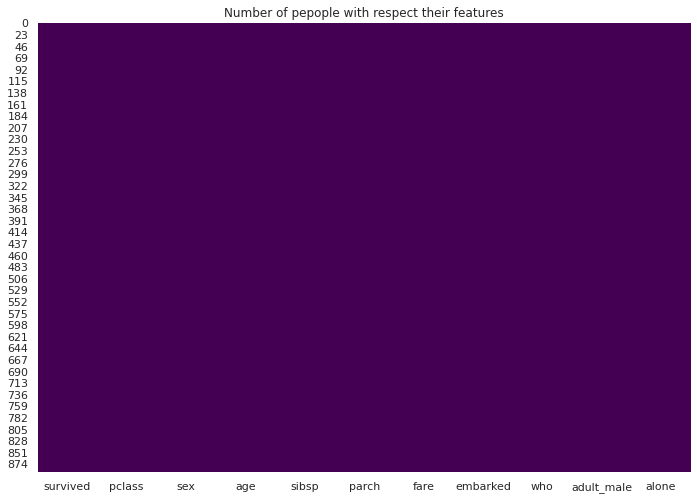

In [ ]:
sb.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Number of pepople with respect their features')

#### Info corregida

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   who         891 non-null    object 
 9   adult_male  891 non-null    bool   
 10  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True


#### Nomalización de los datos

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
captura_caracteristicas = [x for x in titanic.columns if titanic[x].dtype=='object']

for col in captura_caracteristicas:
  if col in titanic.columns:
    i = titanic.columns.get_loc(col)
    titanic.iloc[: , i] = titanic.apply(lambda i:label_encoder.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   who         891 non-null    int64  
 9   adult_male  891 non-null    bool   
 10  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(7)
memory usage: 64.5 KB


In [ ]:
adult_male = {True:1, False:0}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)
alone = {True:1, False:0}
titanic['alone'] = titanic['alone'].map(alone)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,2,1,1,0
1,1,1,0,38.0,1,0,71.2833,0,2,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,1
3,1,1,0,35.0,1,0,53.1000,2,2,0,0
4,0,3,1,35.0,0,0,8.0500,2,1,1,1


#### Analisís de los datos

In [ ]:
titanic.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.292875,0.523008,0.381594,32.204208,1.536476,1.210999,0.602694,0.602694
std,0.486592,0.836071,0.477990,13.210527,1.102743,0.806057,49.693429,0.791503,0.594291,0.489615,0.489615
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,2.000000,2.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,2.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

IndexError: ignored

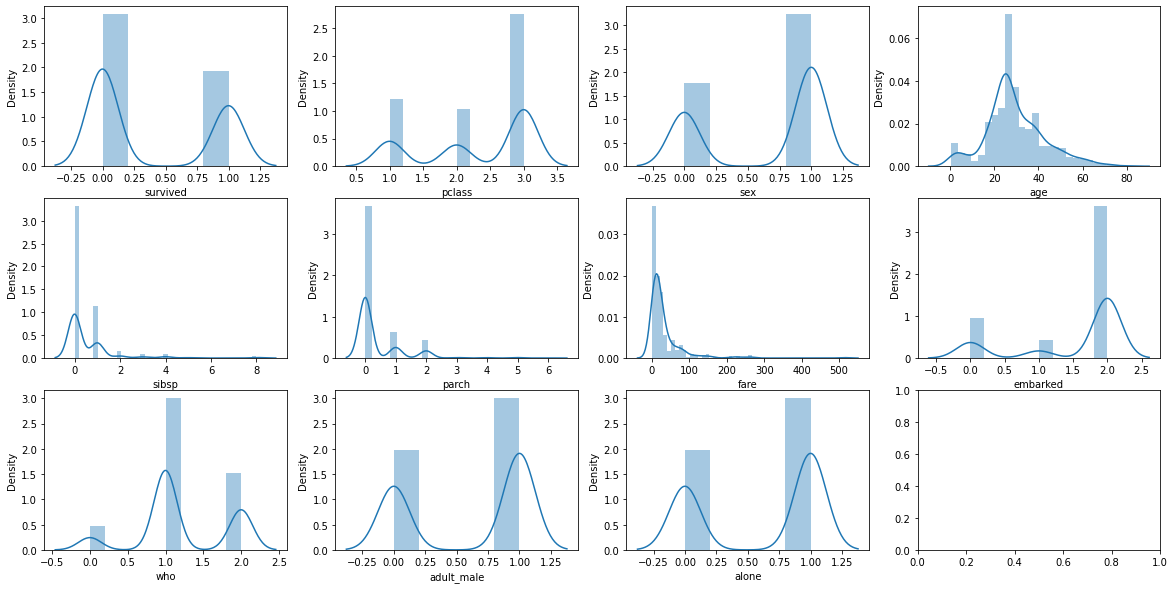

In [ ]:
rows = 3
cols = 4

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10))

col = titanic.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sb.distplot(titanic[col[index]], ax=ax[i][j])
        index += 1

plt.tight_layout()

#### Medidas de tendencia central

In [ ]:
std = titanic['sex'].std(ddof=0)

var = titanic['sex'].var(ddof=0)
std2 = np.sqrt(var)

print('Desviación Típica: %.4f' % std)

print('Varianza: %0.4f' % var)
print('Desviación Típica: %.4f' % std2)

Desviación Típica: 0.4777
Varianza: 0.2282
Desviación Típica: 0.4777


In [ ]:
import scipy.stats as ss

cv = titanic['sex'].std(ddof=0) / titanic['sex'].mean()
cv2 = ss.variation(titanic['sex'])

print('Coeficiente de variación: %0.10f' % cv2)

Coeficiente de variación: 0.7376951318


In [ ]:
# Covarianza
titanic.cov()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
survived,0.236772,-0.137703,-0.126376,-0.324644,-0.018954,0.032017,6.221787,-0.064578,0.094200,-0.132720,-0.048451
pclass,-0.137703,0.699015,0.052712,-4.460584,0.076599,0.012429,-22.830196,0.107269,-0.097781,0.038494,0.055347
sex,-0.126376,0.052712,0.228475,0.508090,-0.060422,-0.094584,-4.330946,0.040959,-0.181737,0.212636,0.071063
age,-0.324644,-4.460584,0.508090,174.518032,-3.546563,-1.871983,79.359072,-0.173806,2.696665,1.578927,1.105248
sibsp,-0.018954,0.076599,-0.060422,-3.546563,1.216043,0.368739,8.748734,0.059553,-0.089130,-0.136916,-0.315568
parch,0.032017,0.012429,-0.094584,-1.871983,0.368739,0.649728,8.661052,0.025391,-0.026674,-0.138108,-0.230242
fare,6.221787,-22.830196,-4.330946,79.359072,8.748734,8.661052,2469.436846,-8.838774,4.320282,-4.428757,-6.613861
embarked,-0.064578,0.107269,0.040959,-0.173806,0.059553,0.025391,-8.838774,0.626477,-0.030177,0.035857,0.024621
who,0.094200,-0.097781,-0.181737,2.696665,-0.089130,-0.026674,4.320282,-0.030177,0.353182,-0.127311,0.001903
adult_male,-0.132720,0.038494,0.212636,1.578927,-0.136916,-0.138108,-4.428757,0.035857,-0.127311,0.239723,0.097026


In [ ]:
# Correlacion
titanic.corr()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
survived,1.000000,-0.338481,-0.543351,-0.050504,-0.035322,0.081629,0.257307,-0.167675,0.325753,-0.557080,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.403858,0.083081,0.018443,-0.549500,0.162098,-0.196793,0.094035,0.135207
sex,-0.543351,0.131900,1.000000,0.080464,-0.114631,-0.245489,-0.182333,0.108262,-0.639773,0.908578,0.303646
age,-0.050504,-0.403858,0.080464,1.000000,-0.243452,-0.175799,0.120886,-0.016622,0.343485,0.244111,0.170877
sibsp,-0.035322,0.083081,-0.114631,-0.243452,1.000000,0.414838,0.159651,0.068230,-0.136003,-0.253586,-0.584471
parch,0.081629,0.018443,-0.245489,-0.175799,0.414838,1.000000,0.216225,0.039798,-0.055682,-0.349943,-0.583398
fare,0.257307,-0.549500,-0.182333,0.120886,0.159651,0.216225,1.000000,-0.224719,0.146290,-0.182024,-0.271832
embarked,-0.167675,0.162098,0.108262,-0.016622,0.068230,0.039798,-0.224719,1.000000,-0.064154,0.092526,0.063532
who,0.325753,-0.196793,-0.639773,0.343485,-0.136003,-0.055682,0.146290,-0.064154,1.000000,-0.437532,0.006540
adult_male,-0.557080,0.094035,0.908578,0.244111,-0.253586,-0.349943,-0.182024,0.092526,-0.437532,1.000000,0.404744


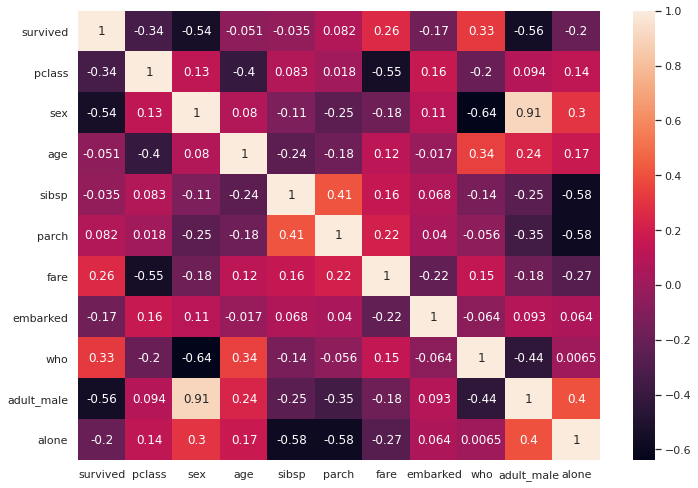

In [ ]:
sb.heatmap(titanic.corr(), annot=True)

In [ ]:
# Media aritmética
titanic.mean()

survived       0.383838
pclass         2.308642
sex            0.647587
age           29.292875
sibsp          0.523008
parch          0.381594
fare          32.204208
embarked       1.536476
who            1.210999
adult_male     0.602694
alone          0.602694
dtype: float64

In [ ]:
# Media geometrica
ss.gmean(titanic)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


array([ 0.        ,  2.1139318 ,  0.        , 24.97188157,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [ ]:
# Media armónica
ss.hmean(titanic)

array([ 0.        ,  1.88904594,  0.        , 14.89669999,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [ ]:
# Mediana
titanic.median()

survived       0.0000
pclass         3.0000
sex            1.0000
age           26.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
embarked       2.0000
who            1.0000
adult_male     1.0000
alone          1.0000
dtype: float64

In [ ]:
# Media truncada
ss.trim_mean(titanic, .10)

array([ 0.35483871,  2.38569425,  0.68443198, 28.73952516,  0.27208976,
        0.18232819, 21.37871557,  1.67040673,  1.25525947,  0.628331  ,
        0.628331  ])

In [ ]:
# Moda
titanic.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,1,25.14062,0,0,8.05,2,1,1,1


### Dataset Covid

In [3]:
import requests

data = requests.get("https://api.covid19api.com/summary").json()
covid = pd.DataFrame.from_dict(data["Countries"])

In [ ]:
covid.describe()

,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
count,190.000000,1.900000e+02,190.000000,190.000000,190.00000,1.900000e+02
mean,2956.110526,7.161543e+05,42.510526,15459.431579,2567.90000,4.083431e+05
std,13784.765830,2.737436e+06,158.101660,54547.235479,12198.74135,1.353014e+06
min,0.000000,1.000000e+00,0.000000,0.000000,0.00000,0.000000e+00
25%,0.000000,9.516750e+03,0.000000,123.000000,0.00000,5.176250e+03
50%,102.000000,8.872450e+04,2.000000,1105.500000,36.50000,4.534150e+04
75%,943.250000,3.334625e+05,17.000000,6610.500000,679.50000,2.323035e+05
max,168912.000000,3.119787e+07,1803.000000,562066.000000,139309.00000,1.215653e+07


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              190 non-null    object
 1   Country         190 non-null    object
 2   CountryCode     190 non-null    object
 3   Slug            190 non-null    object
 4   NewConfirmed    190 non-null    int64 
 5   TotalConfirmed  190 non-null    int64 
 6   NewDeaths       190 non-null    int64 
 7   TotalDeaths     190 non-null    int64 
 8   NewRecovered    190 non-null    int64 
 9   TotalRecovered  190 non-null    int64 
 10  Date            190 non-null    object
 11  Premium         190 non-null    object
dtypes: int64(6), object(6)
memory usage: 17.9+ KB


In [ ]:
covid.head()

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,0f4c47b4-01ba-458c-a24d-4050d1881128,Afghanistan,AF,afghanistan,82,57242,8,2529,16,52005,2021-04-13T02:28:22.158Z,{}
1,09050c57-0074-4b67-b734-84fb6f0fa305,Albania,AL,albania,125,128518,4,2321,546,98269,2021-04-13T02:28:22.158Z,{}
2,d876bcee-979d-4b60-b1ea-4c2644ad04d3,Algeria,DZ,algeria,129,118645,4,3134,104,82704,2021-04-13T02:28:22.158Z,{}
3,5bbf1d08-6eb2-40da-b790-c6b000ac9b6c,Andorra,AD,andorra,36,12581,1,121,65,11890,2021-04-13T02:28:22.158Z,{}
4,101e6f58-f9a8-41d0-ba92-c3ed6739a4fe,Angola,AO,angola,92,23549,1,554,35,22093,2021-04-13T02:28:22.158Z,{}


In [ ]:
pais_max_casos = covid[covid['TotalConfirmed']==covid['TotalConfirmed'].max()]
pais_max_casos

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
181,a9b3824a-a4a0-4dc3-b285-d5d9241c745b,United States of America,US,united-states,46378,31197873,283,562066,0,0,2021-04-13T02:28:22.158Z,{}


In [ ]:
pais_max_muertes = covid[covid['TotalDeaths']==covid['TotalDeaths'].max()]
pais_max_muertes

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
181,a9b3824a-a4a0-4dc3-b285-d5d9241c745b,United States of America,US,united-states,46378,31197873,283,562066,0,0,2021-04-13T02:28:22.158Z,{}


In [4]:
pais_max_recuperados = covid[covid['TotalRecovered']==covid['TotalRecovered'].max()]
pais_max_recuperados

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
76,09dc05a6-e889-40a7-a772-0f9bcdcc8c38,India,IN,india,273802,15061805,1619,178769,144179,12953817,2021-04-19T23:10:50.74Z,{}


In [6]:
pais_min_confirmados = covid[covid['TotalConfirmed']==covid['TotalConfirmed'].min()]
pais_min_confirmados

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
111,38ce3d9f-af31-43e6-a13e-9b25cf7c5a36,"Micronesia, Federated States of",FM,micronesia,0,1,0,0,0,1,2021-04-19T23:10:50.74Z,{}


In [ ]:
pais_min_muertes = covid[covid['TotalDeaths']==0]
pais_min_muertes

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
48,45913d61-4ba0-4e18-93d1-4f2c453fec47,Dominica,DM,dominica,0,165,0,0,0,159,2021-04-13T02:28:22.158Z,{}
72,9db61407-78eb-4355-b29c-6386cb225a1b,Holy See (Vatican City State),VA,holy-see-vatican-city-state,0,27,0,0,0,15,2021-04-13T02:28:22.158Z,{}
91,3c2db362-8683-454e-82b4-e167842b0d99,Lao PDR,LA,lao-pdr,1,52,0,0,2,49,2021-04-13T02:28:22.158Z,{}
107,2c2d47da-9423-4fca-90c9-d2f1e9eef9c4,Marshall Islands,MH,marshall-islands,0,4,0,0,0,4,2021-04-13T02:28:22.158Z,{}
111,8c1fa985-c02b-4b50-a1f9-03a26fe01df0,"Micronesia, Federated States of",FM,micronesia,0,1,0,0,0,1,2021-04-13T02:28:22.158Z,{}
142,1f48911a-273b-42ff-ab0a-75d671f3e8a2,Saint Kitts and Nevis,KN,saint-kitts-and-nevis,0,44,0,0,0,44,2021-04-13T02:28:22.158Z,{}
145,1259856b-54af-4d10-a03e-e40337898856,Samoa,WS,samoa,0,3,0,0,0,2,2021-04-13T02:28:22.158Z,{}
156,2b3b1f96-d8a3-4065-b211-cb5b2cc5006a,Solomon Islands,SB,solomon-islands,0,19,0,0,0,18,2021-04-13T02:28:22.158Z,{}
184,a42ec283-fbe7-4cf7-bdba-c990bc109d3f,Vanuatu,VU,vanuatu,0,3,0,0,0,1,2021-04-13T02:28:22.158Z,{}


In [ ]:
pais_min_conf = covid[covid['TotalConfirmed']==0]
pais_min_conf

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium


In [7]:
covid['TotalConfirmed'].quantile([.25, .5, .75])

0.25      9824.5
0.50     91313.5
0.75    343567.0
Name: TotalConfirmed, dtype: float64

In [8]:
covid['TotalRecovered'].quantile([.25, .5, .75])

0.25      5245.75
0.50     45564.50
0.75    239897.50
Name: TotalRecovered, dtype: float64

In [ ]:
covid['TotalDeaths'].quantile([.25, .5, .75])

0.25     123.0
0.50    1105.5
0.75    6610.5
Name: TotalDeaths, dtype: float64

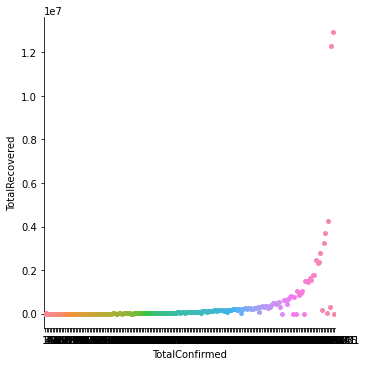

In [12]:
sb.catplot(x='TotalConfirmed', y='TotalRecovered', data=covid)

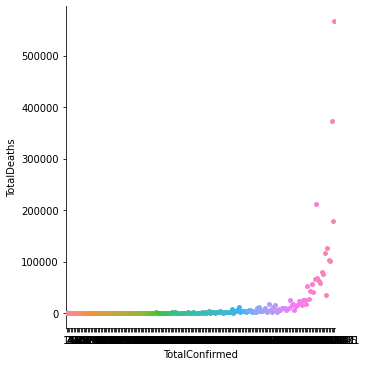

In [11]:
sb.catplot(x='TotalConfirmed', y='TotalDeaths', data=covid)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


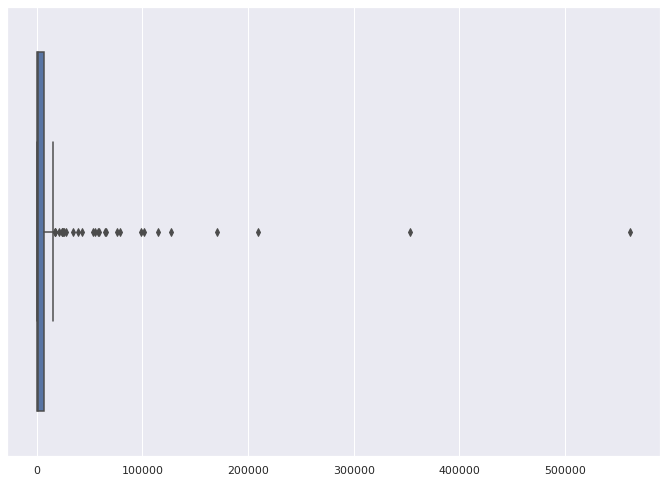

In [ ]:
# diagrama de cajas
cajas = sb.boxplot(list(covid['TotalDeaths']))

In [15]:
porc_recuperados_mundial = (covid['TotalRecovered'].sum() * 100) / covid['TotalConfirmed'].sum()
porc_recuperados_mundial

57.186947257108514

In [16]:
porc_muertes_mundial = (covid['TotalDeaths'].sum() * 100) / covid['TotalConfirmed'].sum()
porc_muertes_mundial

2.1365962695439857

In [17]:
porc_activos = 100 - porc_recuperados_mundial - porc_muertes_mundial
porc_activos

40.6764564733475

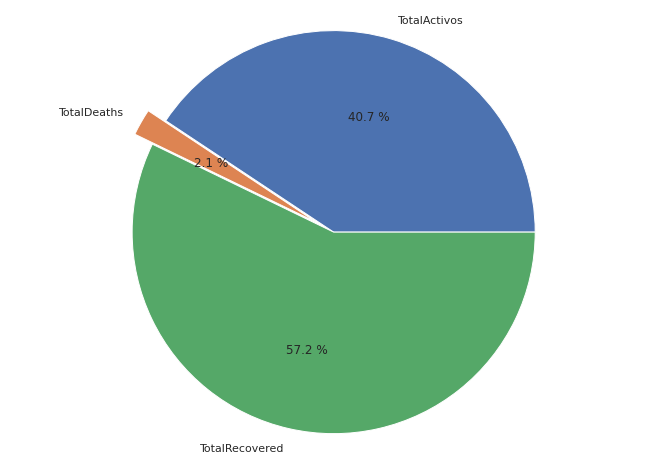

In [19]:
import matplotlib.pyplot as plt

activos = (covid['TotalConfirmed'].sum()-covid['TotalDeaths'].sum()-covid['TotalRecovered'].sum())

values = [activos, covid['TotalDeaths'].sum(), covid['TotalRecovered'].sum()]
nombres = ['TotalActivos', 'TotalDeaths', 'TotalRecovered']
desfase = (0, 0.1, 0)

plt.pie(values, labels=nombres, autopct="%0.1f %%", explode=desfase)
plt.axis("equal")
plt.show()

In [ ]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.distplot(covid['TotalConfirmed'])
plt.show()

In [ ]:
# Muertos totales
covid['TotalDeaths'].sum()

2937292

In [ ]:
# Casos confirmados Totales
covid['TotalConfirmed'].sum()

136069313

In [ ]:
# Recuperados Totales
covid['TotalRecovered'].sum()

77585186

In [20]:
colombia = covid[covid['Country']=='Colombia']

In [ ]:
colombia.head()

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
36,4b76da6b-04ce-465f-b384-51753185e22c,Colombia,CO,colombia,17483,2536198,281,65889,8609,2383785,2021-04-13T02:28:22.158Z,{}


In [21]:
colombia_num = colombia[['TotalConfirmed', 'TotalDeaths', 'TotalRecovered']]

In [ ]:
colombia_num.head()

,TotalConfirmed,TotalDeaths,TotalRecovered
36,2536198,65889,2383785


In [ ]:
casos_activos = (colombia_num['TotalConfirmed'] - colombia_num['TotalRecovered'] - colombia_num['TotalDeaths'])
casos_activos

36    86524
dtype: int64

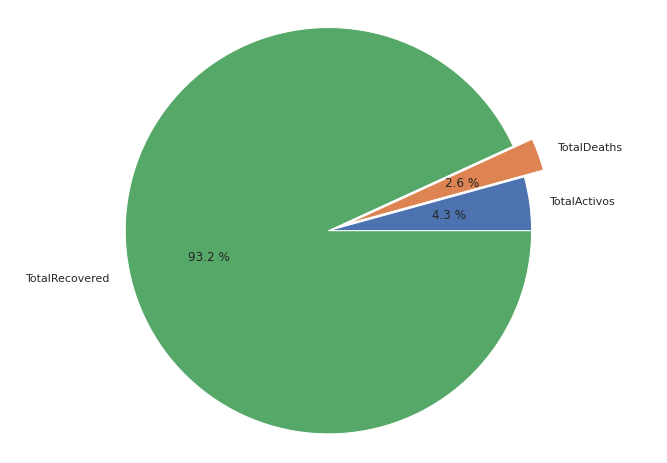

In [22]:
import matplotlib.pyplot as plt

activos = (colombia_num['TotalConfirmed'].sum()-colombia_num['TotalDeaths'].sum()-colombia_num['TotalRecovered'].sum())

values = [activos, colombia_num['TotalDeaths'].sum(), colombia_num['TotalRecovered'].sum()]
nombres = ['TotalActivos', 'TotalDeaths', 'TotalRecovered']
desfase = (0, 0.1, 0)

plt.pie(values, labels=nombres, autopct="%0.1f %%", explode=desfase)
plt.axis("equal")
plt.show()

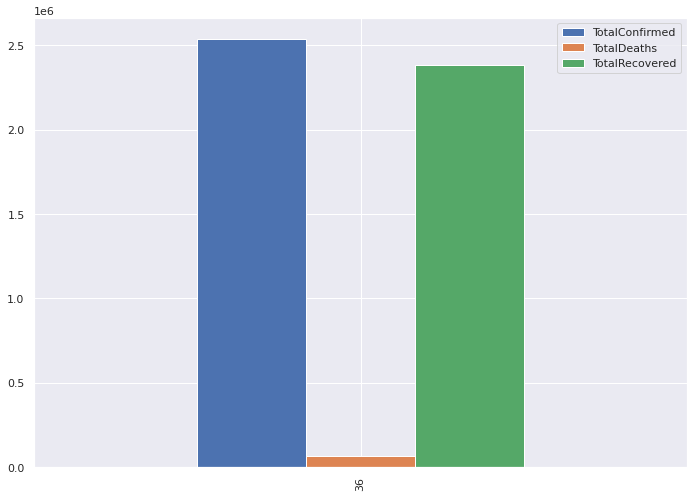

In [ ]:
colombia_num.plot(kind='bar')

In [26]:
total_muertes = covid['TotalDeaths'].sum()
total_muertes

3017063

In [ ]:
por_muer_col = (colombia['TotalDeaths'].sum() * 100) / total_muertes
print('Colombia representa un porcentaje de muertes totales del %.5f' % por_muer_col)

Colombia representa un porcentaje de muertes totales del 2.24319


In [25]:
total_casos = covid['TotalConfirmed'].sum()
por_conf_col = (colombia['TotalConfirmed'].sum() * 100) / total_casos
por_conf_col

1.8787399081483909

In [24]:
total_recuperados = covid['TotalRecovered'].sum()
por_recu_col = (colombia['TotalRecovered'].sum() * 100) / total_recuperados
por_recu_col

3.0605637955628415

In [27]:
activos = total_casos - total_recuperados - total_muertes
activos_colombia = colombia['TotalConfirmed'].sum() - colombia['TotalDeaths'].sum() -colombia['TotalRecovered'].sum()
por_act_col = (activos_colombia * 100) / activos
por_act_col

0.19694193934144397

In [ ]:
por_muer_glo = (covid['TotalDeaths'].sum()*100)/covid['TotalConfirmed'].sum()
por_muer_glo

2.1586733520143517

### Dataset Vinos

In [ ]:
from sklearn import datasets

In [ ]:
data = datasets.load_wine()

In [ ]:
vino = pd.DataFrame(data.data, columns=data.feature_names)
vino['wine_class'] = data.target

In [ ]:
vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_

In [ ]:
vino.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

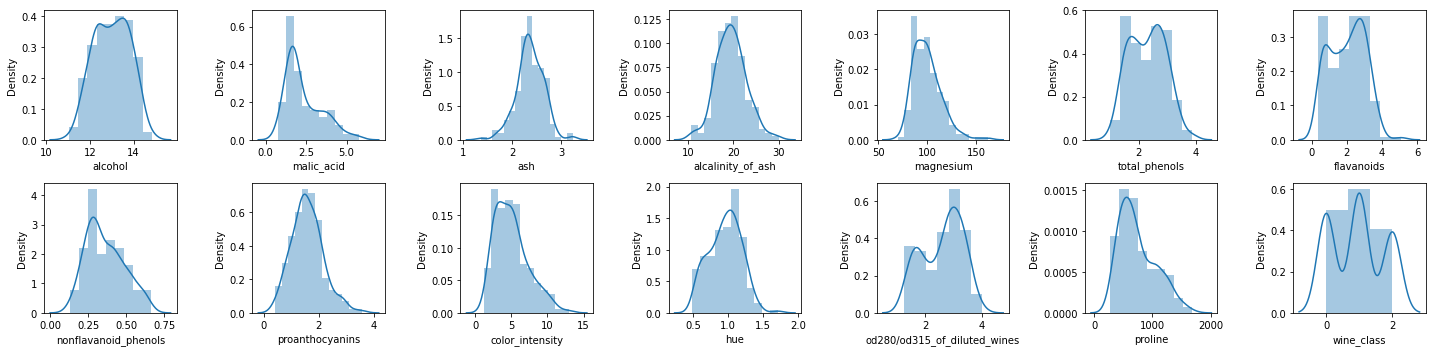

In [ ]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,5))

col = vino.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sb.distplot(vino[col[index]], ax=ax[i][j])
        index += 1

plt.tight_layout()

#### Medidas de tendencia central

In [ ]:
std = vino.std(ddof=0)

var = vino.var(ddof=0)
std2 = np.sqrt(var)

std

alcohol                             0.655360
malic_acid                          1.241004
ash                                 0.074842
alcalinity_of_ash                  11.090031
magnesium                         202.843328
total_phenols                       0.389489
flavanoids                          0.992114
nonflavanoid_phenols                0.015402
proanthocyanins                     0.325754
color_intensity                     5.344256
hue                                 0.051951
od280/od315_of_diluted_wines        0.501254
proline                         98609.600966
wine_class                          0.597305
dtype: float64

In [ ]:
var

alcohol                             0.655360
malic_acid                          1.241004
ash                                 0.074842
alcalinity_of_ash                  11.090031
magnesium                         202.843328
total_phenols                       0.389489
flavanoids                          0.992114
nonflavanoid_phenols                0.015402
proanthocyanins                     0.325754
color_intensity                     5.344256
hue                                 0.051951
od280/od315_of_diluted_wines        0.501254
proline                         98609.600966
wine_class                          0.597305
dtype: float64

In [ ]:
import scipy.stats as ss

# Coeficiente de variación
cv2 = ss.variation(vino)
cv2

array([0.06226957, 0.47681402, 0.11560124, 0.17082223, 0.14279209,
       0.27192157, 0.4908411 , 0.34296507, 0.35875872, 0.45704302,
       0.23805811, 0.27108673, 0.42043713, 0.82376147])

In [ ]:
# Covarianza
vino.cov()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
alcohol,0.659062,0.085611,0.047115,-0.841093,3.139878,0.146887,0.192033,-0.015754,0.063518,1.028283,-0.013313,0.041698,164.567185,-0.206515
malic_acid,0.085611,1.248015,0.050277,1.076332,-0.870780,-0.234338,-0.458630,0.040733,-0.141147,0.644838,-0.143326,-0.292447,-67.548867,0.379039
ash,0.047115,0.050277,0.075265,0.406208,1.122937,0.022146,0.031535,0.006358,0.001516,0.164654,-0.004682,0.000762,19.319739,-0.010555
alcalinity_of_ash,-0.841093,1.076332,0.406208,11.152686,-3.974760,-0.671149,-1.172083,0.150422,-0.377176,0.145024,-0.209118,-0.656234,-463.355345,1.340364
magnesium,3.139878,-0.870780,1.122937,-3.974760,203.989335,1.916470,2.793087,-0.455563,1.932832,6.620521,0.180851,0.669308,1769.158700,-2.315495
total_phenols,0.146887,-0.234338,0.022146,-0.671149,1.916470,0.391690,0.540470,-0.035045,0.219373,-0.079998,0.062039,0.311021,98.171057,-0.348835
flavanoids,0.192033,-0.458630,0.031535,-1.172083,2.793087,0.540470,0.997719,-0.066867,0.373148,-0.399169,0.124082,0.558262,155.447492,-0.656091
nonflavanoid_phenols,-0.015754,0.040733,0.006358,0.150422,-0.455563,-0.035045,-0.066867,0.015489,-0.026060,0.040121,-0.007471,-0.044469,-12.203586,0.047177
proanthocyanins,0.063518,-0.141147,0.001516,-0.377176,1.932832,0.219373,0.373148,-0.026060,0.327595,-0.033504,0.038665,0.210933,59.554334,-0.221413
color_intensity,1.028283,0.644838,0.164654,0.145024,6.620521,-0.079998,-0.399169,0.040121,-0.033504,5.374449,-0.276506,-0.705813,230.767480,0.477339


In [ ]:
# Correlacion
vino.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [ ]:
# Media aritmética
vino.mean()

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
wine_class                        0.938202
dtype: float64

In [ ]:
# Media geometrica
ss.gmean(vino)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


array([1.29752784e+01, 2.10655027e+00, 2.35006078e+00, 1.92047930e+01,
       9.87945076e+01, 2.20614882e+00, 1.72633531e+00, 3.40592502e-01,
       1.48269582e+00, 4.56323347e+00, 9.28760027e-01, 2.50412397e+00,
       6.85605753e+02, 0.00000000e+00])

In [ ]:
# Media armónica
ss.hmean(vino)

array([1.29498207e+01, 1.91402549e+00, 2.33268680e+00, 1.89038316e+01,
       9.79056615e+01, 2.11425211e+00, 1.39305807e+00, 3.19560143e-01,
       1.36201459e+00, 4.10641888e+00, 8.98573781e-01, 2.38715250e+00,
       6.30550129e+02, 0.00000000e+00])

In [ ]:
# Mediana
vino.median()

alcohol                          13.050
malic_acid                        1.865
ash                               2.360
alcalinity_of_ash                19.500
magnesium                        98.000
total_phenols                     2.355
flavanoids                        2.135
nonflavanoid_phenols              0.340
proanthocyanins                   1.555
color_intensity                   4.690
hue                               0.965
od280/od315_of_diluted_wines      2.780
proline                         673.500
wine_class                        1.000
dtype: float64

In [ ]:
# Media truncada
ss.trim_mean(vino, .10)

array([1.30063889e+01, 2.21152778e+00, 2.37375000e+00, 1.94194444e+01,
       9.84444444e+01, 2.28576389e+00, 2.02020833e+00, 3.55069444e-01,
       1.56409722e+00, 4.82770833e+00, 9.58583333e-01, 2.63118056e+00,
       7.19298611e+02, 9.23611111e-01])

In [ ]:
# Moda
vino.mode()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,12.37,1.73,2.28,20.0,88.0,2.2,2.65,0.26,1.35,2.6,1.04,2.87,520.0,1.0
1,13.05,NaN,2.30,NaN,NaN,NaN,NaN,0.43,NaN,3.8,NaN,NaN,680.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN
